## Python statistics essential training - 05_02_fitmodel

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [10]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

country  year region  population  life_expectancy  age5_surviving  \
0  Afghanistan  1800   Asia   3280000.0            28.21          53.142   
1  Afghanistan  1810   Asia   3280000.0            28.11          53.002   
2  Afghanistan  1820   Asia   3323519.0            28.01          52.862   
3  Afghanistan  1830   Asia   3448982.0            27.90          52.719   
4  Afghanistan  1840   Asia   3625022.0            27.80          52.576   

   babies_per_woman  gdp_per_capita  gdp_per_day  
0               7.0           603.0     1.650924  
1               7.0           604.0     1.653662  
2               7.0           604.0     1.653662  
3               7.0           625.0     1.711157  
4               7.0           647.0     1.771389

In [7]:
gdata = gapminder.query('year == 1985')

In [8]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

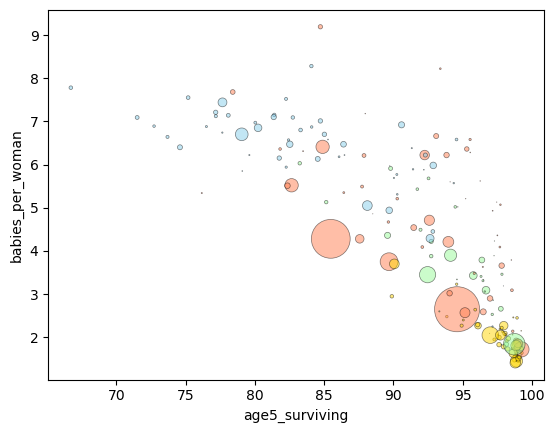

In [9]:
#scatter plot of child survival rate past 5 yrs old vs number of babies/woman
#dot size expresses the population while the color denotes the continent/region. 
plotdata()

<p> Ordinary Least Squares (OLS) is a method used in statistics to find the best-fitting line through a set of data points. The goal of OLS is to make predictions by minimizing the "errors" or differences between the actual data points and the predictions made by the line.</p>

In [13]:
#ordinary least square (OLS)
#formula goes x-value, ~, model terms. 
#for example: babies_per_woman ~ age5_surviving
#the '1' represents a constant
#the ~ is used in R statistical language
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)

In [14]:
#fit the model
grandmean = model.fit()

In [12]:
grandmean

In [16]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

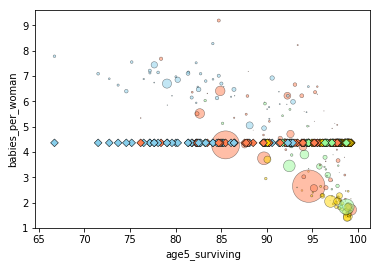

In [17]:
plotfit(grandmean) #this plots the OLS into the gdata scatter plot. fit is the genereic name that is used in the function. 
#the 'grandmean' is equivalent to the mean of the y-value (babies_per_woman)

In [18]:
grandmean.params
#this holds the mean of the y-value. AKA the intercept

Intercept    4.360714
dtype: float64

In [19]:
gdata.babies_per_woman.mean()

4.360714285714285

In [20]:
#this introduces the mean or the OLS by regions. 
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region',data=gdata).fit()

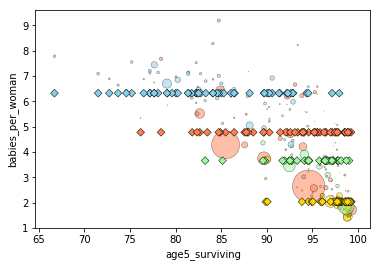

In [21]:
plotfit(groupmeans)

In [22]:
groupmeans.params
#we get the result as the common constant term and is offsetted by 4 groups - 1 of the group

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [23]:
#to treat all groups the same we make the ~1 a ~-1
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

In [24]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [25]:
#this is just to compare the means of the regions from the intercept above. 
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [26]:
#we add the child survival variable into the OLS. 
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

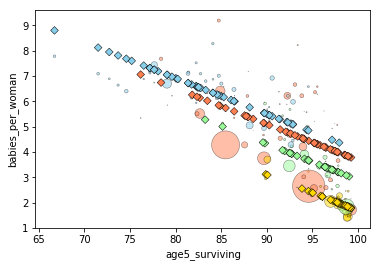

In [27]:
plotfit(surviving)

In [28]:
#this shows that the slope (age by surviving) 
#for every additional percentage point of child survival to age 5, the number of babies per woman decreses by .14
#this shows the avg number of children by a survival rate of 0% before age 5
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [29]:
#slope/survival rate by region: 
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()

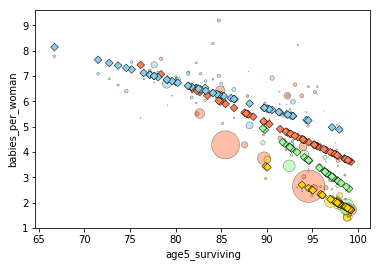

In [30]:
plotfit(surviving_byregion)

In [31]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

<p>This output shows the coefficients (parameters) from the regression model. Hereâ€™s what each coefficient means:

Baseline Fertility Rates for Each Region:

region[Africa] = 15.080914: In Africa, the baseline fertility rate (number of babies per woman) is about 15.08 when age5_surviving is not considered.
region[America] = 27.506243: In America, the baseline fertility rate is about 27.51.
region[Asia] = 20.032483: In Asia, the baseline fertility rate is about 20.03.
region[Europe] = 19.884446: In Europe, the baseline fertility rate is about 19.88.
Effect of Child Survival Rate on Fertility by Region:

age5_surviving:region[Africa] = -0.104053: In Africa, for every 1 unit increase in the child survival rate (age5_surviving), the number of babies per woman decreases by approximately 0.104.
age5_surviving:region[America] = -0.251994: In America, a 1 unit increase in age5_surviving decreases the number of babies per woman by about 0.252.
age5_surviving:region[Asia] = -0.165384: In Asia, a 1 unit increase in age5_surviving decreases the fertility rate by about 0.165.
age5_surviving:region[Europe] = -0.183029: In Europe, a 1 unit increase in age5_surviving decreases the number of babies per woman by about 0.183.
What Does This Mean?
Region-Specific Fertility Rates: Each region has its own baseline fertility rate, which is different across Africa, America, Asia, and Europe. For example, America has the highest baseline fertility rate at 27.51, while Africa has the lowest at 15.08.

Interaction of Child Survival and Region: The impact of child survival (age5_surviving) on fertility is different in each region. In all regions, as child survival rates increase, the fertility rates tend to decrease. However, this decrease is larger in America (0.252 decrease per unit increase in child survival) compared to Africa (0.104 decrease per unit increase).

Why Interaction Terms Matter: By including the interaction terms age5_surviving:region, the model accounts for the fact that the relationship between child survival and fertility isn't the same across all regions. This makes the model more flexible and region-specific.

In Summary:
This regression model shows how the number of babies per woman depends on both the region and the interaction between child survival rates and the region. It highlights that different regions have different fertility baselines and that the effect of improving child survival rates varies depending on the region.</p>

In [16]:
#we make the slope proportional to population. 
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()

In [17]:
plotfit(surviving_byregion_population)

NameError: name 'plotfit' is not defined

In [18]:
surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64

<p> Breakdown of Coefficients:
Region Coefficients:

region[Africa] = 15.13953: This is the baseline fertility rate (babies per woman) for Africa, before accounting for the effects of age5_surviving and population.
region[America] = 27.21512: The baseline fertility rate for America is about 27.22 babies per woman.
region[Asia] = 20.60924: In Asia, the baseline fertility rate is around 20.61.
region[Europe] = 19.97501: The baseline fertility rate for Europe is around 19.98 babies per woman.
Interaction Terms (Effect of Child Survival Rates by Region):

age5_surviving:region[Africa] = -0.104461: For Africa, a 1-unit increase in the child survival rate (age5_surviving) results in a decrease of about 0.104 babies per woman.
age5_surviving:region[America] = -0.248411: For America, a 1-unit increase in age5_surviving decreases the number of babies per woman by approximately 0.248.
age5_surviving:region[Asia] = -0.170239: In Asia, a 1-unit increase in age5_surviving decreases fertility by approximately 0.170.
age5_surviving:region[Europe] = -0.183532: For Europe, a 1-unit increase in child survival rate decreases fertility by about 0.183.
Population Coefficient:

population = -2.367914e-09: The coefficient for population is very small, indicating that population size has a slight negative effect on fertility rate. Specifically, for each additional person in the population, the fertility rate decreases by a very small amount: -0.000000002367914. While the effect is negative, its magnitude is tiny, which means population size does not have a significant impact on the fertility rate in this model.
Interpretation:
Region: Each region has a different baseline fertility rate. For instance, America has the highest baseline fertility rate at around 27.22 babies per woman, while Africa has a lower baseline at around 15.14.

Interaction of Child Survival Rates and Region: The effect of child survival rates on fertility varies by region. In all regions, higher child survival rates are associated with lower fertility rates, but the magnitude of this effect differs across regions. America experiences the largest decrease in fertility rates as child survival improves, while Africa experiences a smaller reduction.

Population: The effect of population on fertility is negative but almost negligible. This suggests that population size does not play a significant role in determining the number of babies per woman in this model.

Summary:
The regression model explains how fertility rates (babies per woman) are influenced by the region, child survival rates (which vary by region), and population. The model suggests that different regions have different baseline fertility rates and that child survival rates have a negative impact on fertility across all regions. Population size has a very small negative effect on fertility.






</p>